In [230]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import math
#%matplotlib qt
%matplotlib inline

In [231]:
def original(T, a_0, a_12, a_1, b_12, b_1, b_32):
    upper  = a_0 + (a_12)*(T**(1/2)) + a_1*T
    lower = T**(1/6) + (b_12)*(T**(1/2)) + (b_1)*(T) + (b_32)*(T**(3/2))
    value = upper/lower
    return value

 C + H3+  ->  CH+ + H2
 Measured from 72 k to 10^4 K

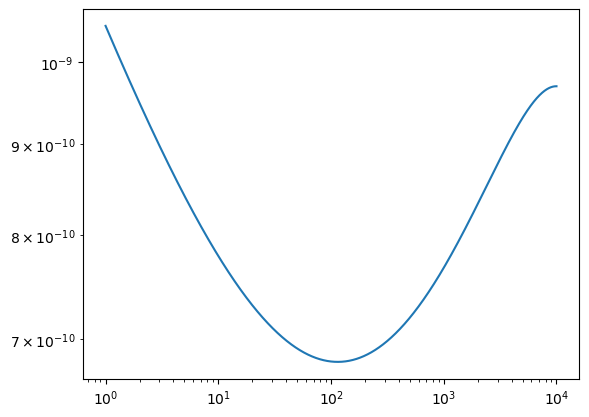

In [232]:
temps = np.logspace(0, 4, 30000)
rates = []
for temp in temps:
    rate = original(temp, 1.0218E-09, 7.2733E-11, 5.9203E-14, 4.4914E-02, -2.6056E-04, 2.6397E-06)
    rates.append(rate)
plt.plot(temps, rates)
plt.xscale("log")
plt.yscale("log")

C:\Users\willi\AppData\Local\Temp\ipykernel_10056\831615753.py:2: RuntimeWarning: overflow encountered in exp
  value = a * ((T/300)**b) * np.exp(-gamma/T)


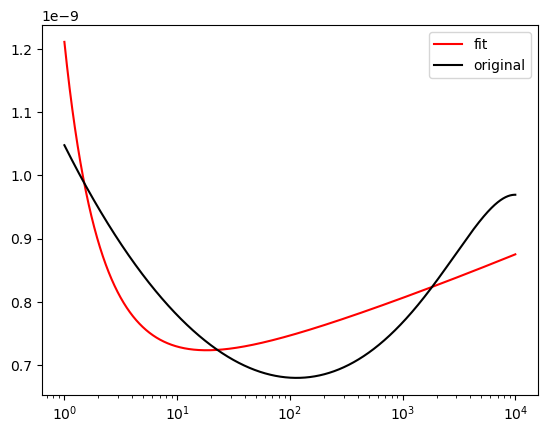

In [233]:
def new(T, a, b, gamma):
    value = a * ((T/300)**b) * np.exp(-gamma/T)
    return value

popt, pcov = optimize.curve_fit(new, temps, rates, method="lm")
perr = np.sqrt(np.diag(pcov))

fit_rates = []
for temp in temps:
    fit_rate = new(temp, popt[0], popt[1], popt[2])
    
    fit_rates.append(fit_rate)

#plot
plt.plot(temps, fit_rates, label = "fit", c = "red")
plt.plot(temps, rates, label = "original", c = "black")
plt.xscale("log")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


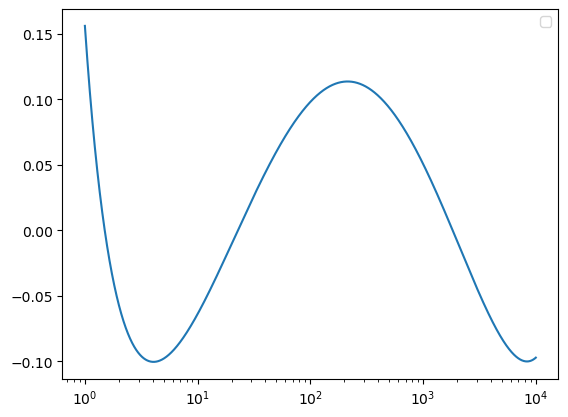

In [234]:
percent = []
for char in range(len(fit_rates)):
    num = (fit_rates[char] - rates[char])/rates[char]
    percent.append(num)
plt.plot(temps, percent)
plt.xscale("log")
#plt.yscale("log")
plt.legend()

In [236]:
def new_2(T, T1, a1, b1, gamma1, b2, gamma2):
    a2 = (a1 * ((T1/300)**(b1-b2))*np.exp((gamma2-gamma1)/T1))

    return np.piecewise(T, [(T <= T1), (T> T1)], 
                        [lambda T:(a1 * ((T/300)**b1) * np.exp(-gamma1/T)), 
                         lambda T:(a2 * ((T/300)**b2) * np.exp(-gamma2/T))])

In [237]:
guess = [1e2, 3.26861968e-10, -1.68304797e-01,  4.41413316e-03, -4.28319281e-01, 3.66065039e+02]
popt, pcov = optimize.curve_fit(new_2, temps, rates, p0 = guess, method="lm")

In [238]:
popt

array([ 6.15895703e+01,  6.02708861e-10, -7.36931322e-02, -1.50952924e-01,
        1.11225151e-01, -1.15397235e+01])

In [239]:
fit_rates2 = []
for temp in temps:
    fit_rate2 = new_2(temp, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])
    fit_rates2.append(fit_rate2)

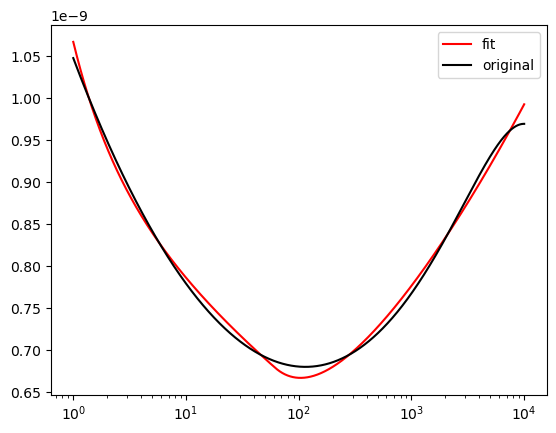

In [240]:
#plot
plt.plot(temps, fit_rates2, label = "fit", c = "red")
plt.plot(temps, rates, label = "original", c = "black")
plt.xscale("log")
#plt.yscale("log")
plt.legend()

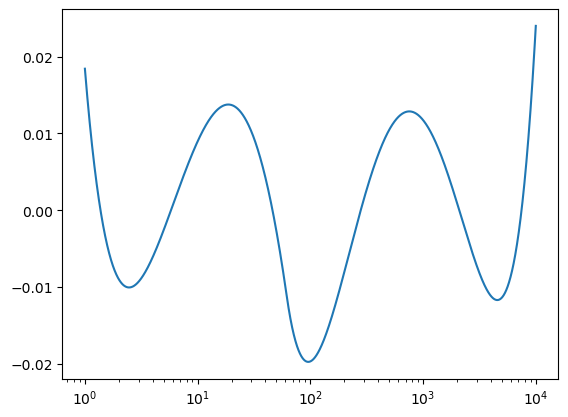

In [241]:
percent = []
for char in range(len(fit_rates2)):
    num = (fit_rates2[char] - rates[char])/rates[char]
    percent.append(num)
plt.plot(temps, percent)
plt.xscale("log")

In [242]:
def new_3(T, T1, T2, a1, b1, gamma1, b2, gamma2, b3, gamma3):
    a2 = (a1 * ((T1/300)**(b1-b2))*np.exp((gamma2-gamma1)/T1))
    a3 = (a2 * ((T2/300)**(b2-b3))*np.exp((gamma3-gamma2)/T2))
    return np.piecewise(T, [(T <= T1), (T> T1) & (T<=T2), (T>T2)], 
                        [lambda T:(a1 * ((T/300)**b1) * np.exp(-gamma1/T)), 
                         lambda T:(a2*((T/300)**b2) * np.exp(-gamma2/T)),
                         lambda T:(a3*((T/300)**b3) * np.exp(-gamma3/T))])

In [274]:
#array([ 6.15895703e+01,  6.02708861e-10, -7.36931322e-02, -1.50952924e-01,1.11225151e-01, -1.15397235e+01])

guess = [ 2e1,  1e2, 
         6.02708861e-10, -7.36931322e-02, -1.50952924e-01, 
         1.11225151e-01, -1.15397235e+01, 
         1.11225151e-01, -1.15397235e+01]
popt, pcov = optimize.curve_fit(new_3, temps, rates, p0 = guess, method="lm", maxfev=10000, ftol = 1e-10)

In [275]:
popt

array([ 2.04144356e+01,  1.00000000e+02,  5.47716683e-10, -1.00876935e-01,
       -7.39351228e-02,  1.52586683e-02, -1.80139941e+00,  1.19522416e-01,
       -1.75602207e+01])

In [276]:
fit_rates3 = []
for temp in temps:
    fit_rate3 = new_3(temp, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8])
    fit_rates3.append(fit_rate3)

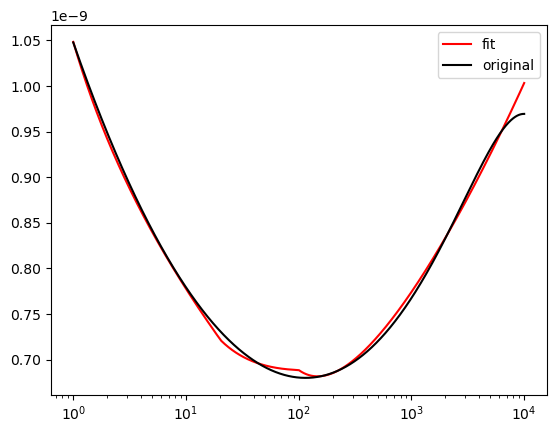

In [277]:
#plot
plt.plot(temps, fit_rates3, label = "fit", c = "red")
plt.plot(temps, rates, label = "original", c = "black")
plt.xscale("log")
#plt.yscale("log")
plt.legend()

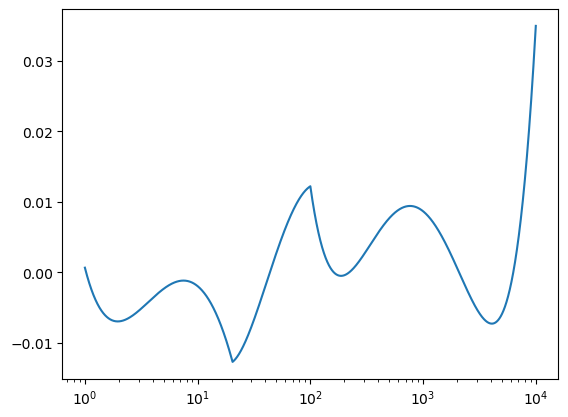

In [278]:
percent = []
for char in range(len(fit_rates3)):
    num = (fit_rates3[char] - rates[char])/rates[char]
    percent.append(num)
plt.plot(temps, percent)
plt.xscale("log")

In [280]:
popt

array([ 2.04144356e+01,  1.00000000e+02,  5.47716683e-10, -1.00876935e-01,
       -7.39351228e-02,  1.52586683e-02, -1.80139941e+00,  1.19522416e-01,
       -1.75602207e+01])

In [279]:
def new_4(T, T1, T2, T3, a1, b1, gamma1, b2, gamma2, b3, gamma3, b4, gamma4):
    a2 = (a1 * ((T1/300)**(b1-b2))*np.exp((gamma2-gamma1)/T1))
    a3 = (a2 * ((T2/300)**(b2-b3))*np.exp((gamma3-gamma2)/T2))
    a4 = (a3 * ((T3/300)**(b3-b4))*np.exp((gamma4-gamma3)/T3))
    return np.piecewise(T, [(T <= T1), (T> T1) & (T<=T2), (T>T2) & (T<=T3), T>T3], 
                        [lambda T:(a1 * ((T/300)**b1) * np.exp(-gamma1/T)), 
                         lambda T:(a2*((T/300)**b2) * np.exp(-gamma2/T)),
                         lambda T:(a3*((T/300)**b3) * np.exp(-gamma3/T)),
                         lambda T:(a4*((T/300)**b4) * np.exp(-gamma4/T))
                        ])

In [282]:
guess = [2.04144356e+01,  1e2, 7e3,
         5.47716683e-10, -1.00876935e-01, -7.39351228e-02, 
         1.52586683e-02, -1.80139941e+00, 
         1.19522416e-01, -1.75602207e+01,
         1.52586683e-02, -1.80139941e+00, 
        ]
popt, pcov = optimize.curve_fit(new_4, temps, rates, p0 = guess, method="lm", maxfev=10000, ftol = 1e-10)

In [283]:
fit_rates4 = []
for temp in temps:
    fit_rate4 = new_4(temp, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9], popt[10], popt[11])
    fit_rates4.append(fit_rate4)

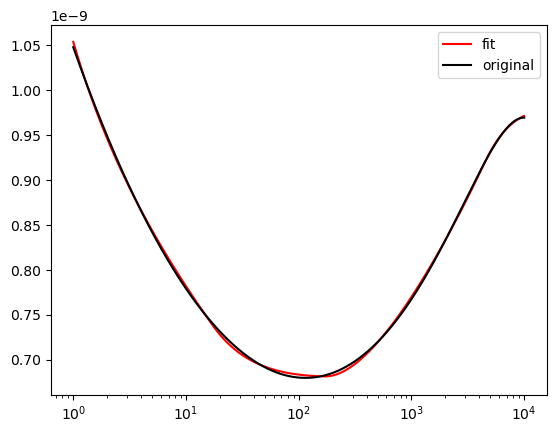

In [284]:
#plot
plt.plot(temps, fit_rates4, label = "fit", c = "red")
plt.plot(temps, rates, label = "original", c = "black")
plt.xscale("log")
#plt.yscale("log")
plt.legend()

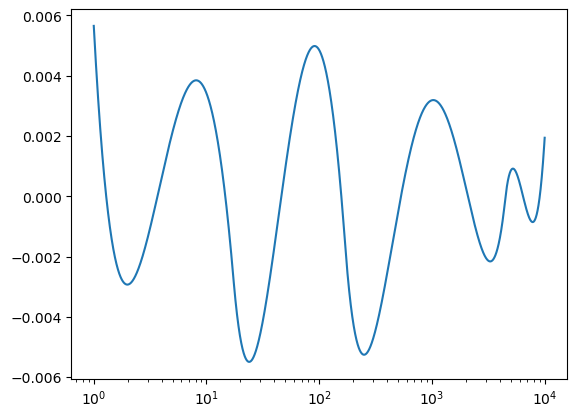

In [288]:
percent = []
for char in range(len(fit_rates4)):
    num = (fit_rates4[char] - rates[char])/rates[char]
    percent.append(num)
plt.plot(temps, percent)
plt.xscale("log")